In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from utils.plot_keypoints import show_keypoints
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
from utils.plot_keypoints import transform_keypoints

In [53]:
comp_data = pd.read_csv('data/complete_body.csv')
incomp_data = pd.read_csv('data/incomplete_body.csv')
fb_data = pd.read_csv('data/full_body.csv')

In [54]:
transformed_data = fb_data.copy()

In [55]:
for index, row in transformed_data.iterrows():
    keypoints = row.values.reshape(17,2)
    trans_key = transform_keypoints(keypoints)
    transformed_data.loc[index] = trans_key.reshape(34)

In [85]:
transformed_data.to_csv('data/transformed_body.csv', index=False)

In [56]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(fb_data)
scaled_df = pd.DataFrame(scaled_data, columns=fb_data.columns)

In [57]:
normalized_df = (fb_data - fb_data.min()) / (fb_data.max() - fb_data.min())

In [80]:
fb_data.idxmax()

nose_x              129
nose_y              634
left_eye_x          129
left_eye_y          633
right_eye_x         129
right_eye_y         631
left_ear_x          129
left_ear_y          634
right_ear_x         129
right_ear_y         631
left_shoulder_x     129
left_shoulder_y     638
right_shoulder_x    129
right_shoulder_y    584
left_elbow_x        127
left_elbow_y        622
right_elbow_x       129
right_elbow_y       598
left_wrist_x         86
left_wrist_y        630
right_wrist_x       127
right_wrist_y       635
left_hip_x          129
left_hip_y          643
right_hip_x         129
right_hip_y         644
left_knee_x          89
left_knee_y         644
right_knee_x         86
right_knee_y        732
left_ankle_x         89
left_ankle_y        691
right_ankle_x        86
right_ankle_y       736
dtype: int64

[[1079.81   35.24]
 [1084.39   30.99]
 [1074.8    31.02]
 [1088.87   36.37]
 [1065.94   36.39]
 [1095.7    62.92]
 [1051.41   63.93]
 [1105.58   95.14]
 [1030.55   99.71]
 [1089.07   77.44]
 [1060.     85.12]
 [1080.91  133.82]
 [1050.57  133.15]
 [1068.32  182.95]
 [1044.24  180.72]
 [1062.33  225.94]
 [1038.68  225.09]]


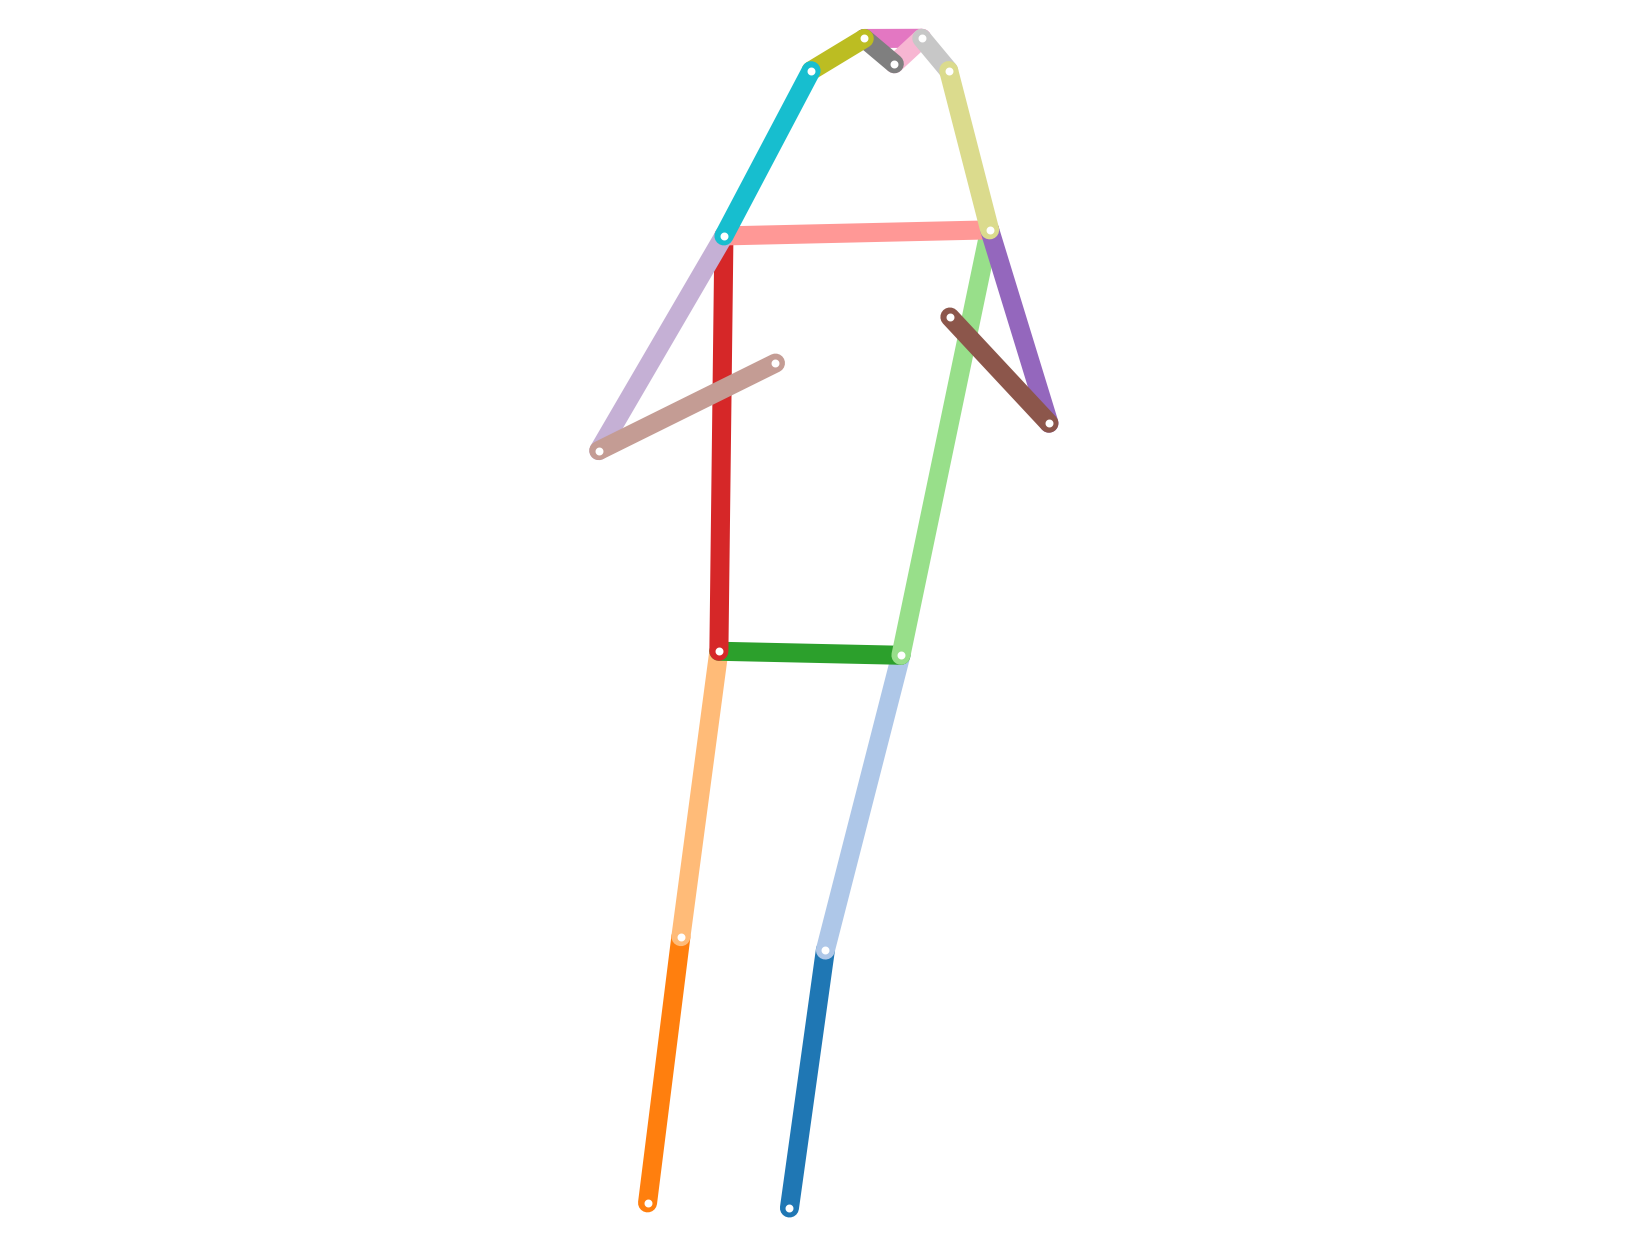

In [82]:
row = fb_data.loc[129].values.reshape(17,2)
print(row)
show_keypoints(row)

[[435.235  20.325]
 [448.975   7.575]
 [420.205   7.665]
 [462.415  23.715]
 [393.625  23.775]
 [482.905 103.365]
 [350.035 106.395]
 [512.545 200.025]
 [287.455 213.735]
 [463.015 146.925]
 [375.805 169.965]
 [438.535 316.065]
 [347.515 314.055]
 [400.765 463.455]
 [328.525 456.765]
 [382.795 592.425]
 [311.845 589.875]]


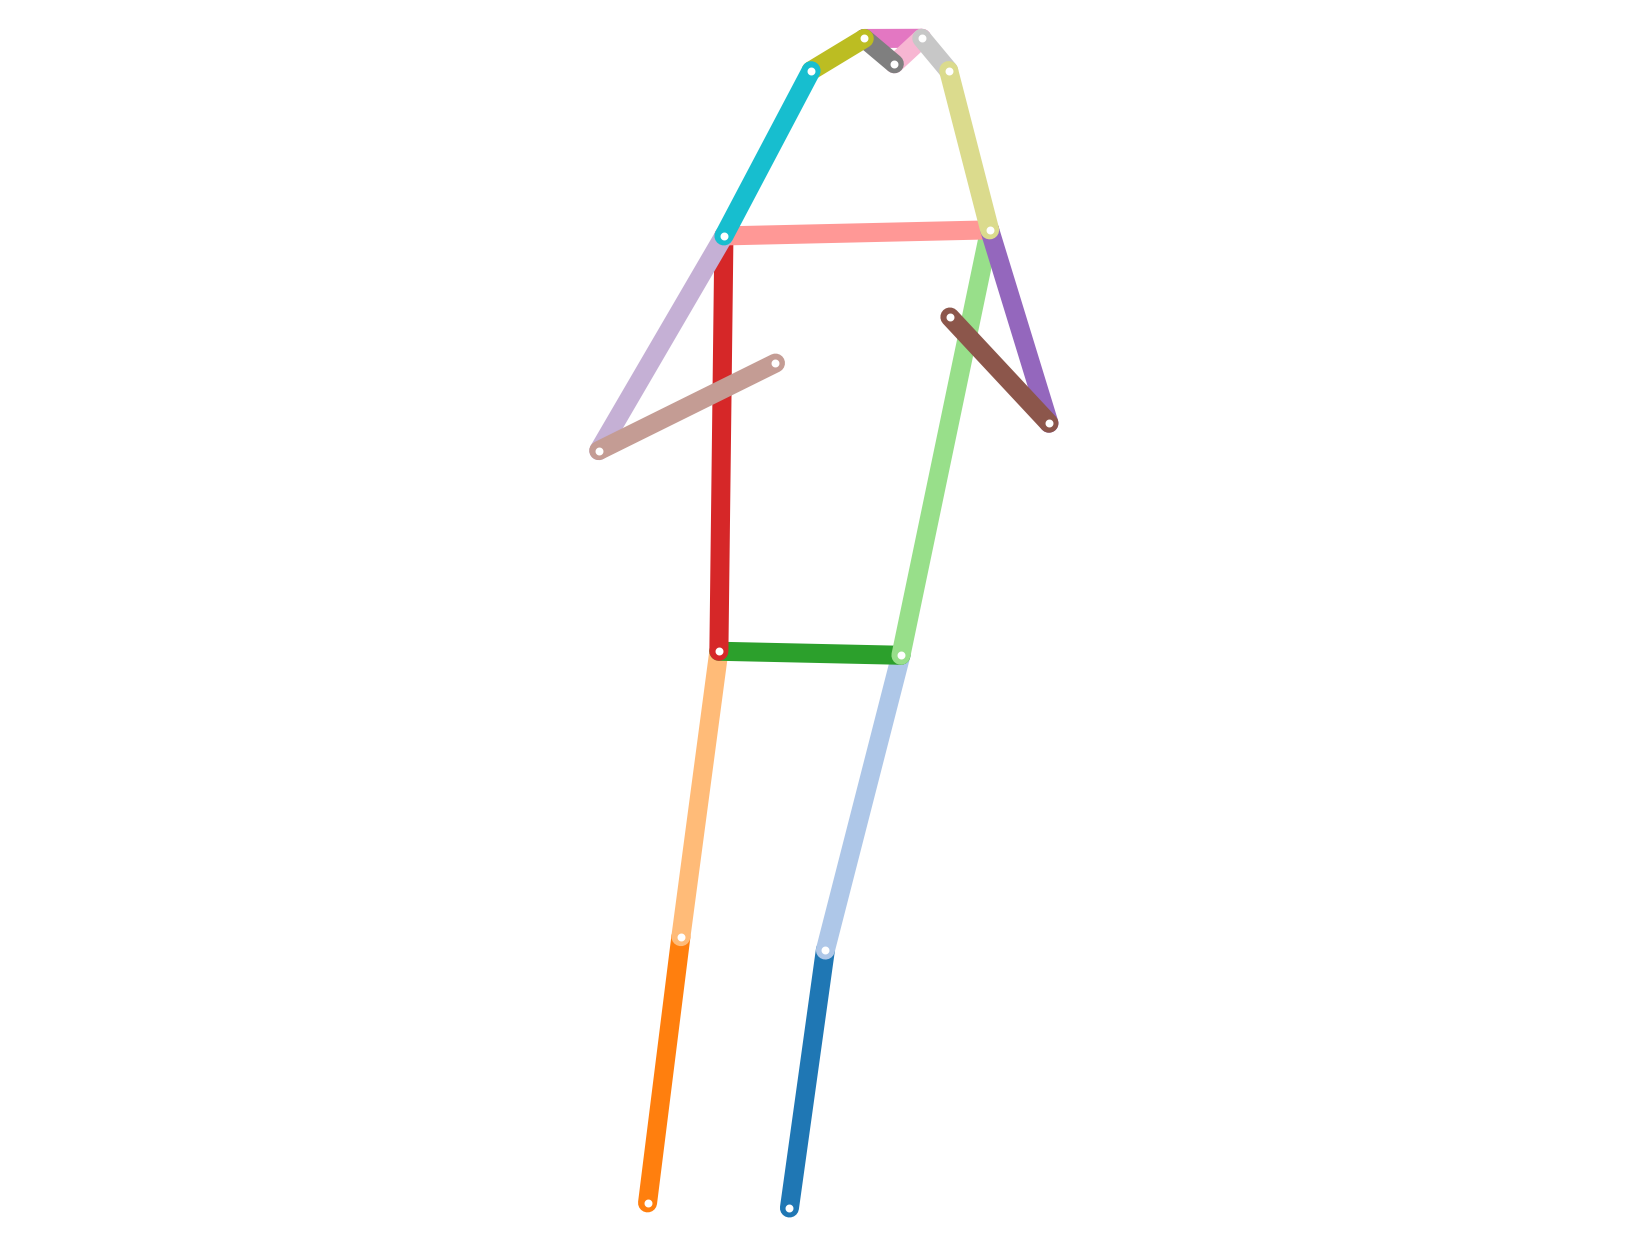

In [83]:
row = transformed_data.loc[129].values.reshape(17,2)
print(row)
show_keypoints(row)

In [43]:
row[:,0]

array([396.66, 405.54, 386.28, 418.16, 370.54, 443.8 , 341.6 , 456.94,
       322.32, 477.68, 348.24, 422.7 , 359.26, 419.04, 342.98, 420.48,
       326.52])

In [44]:
row

array([[396.66,  83.39],
       [405.54,  73.83],
       [386.28,  74.73],
       [418.16,  81.77],
       [370.54,  83.49],
       [443.8 , 138.39],
       [341.6 , 135.89],
       [456.94, 215.09],
       [322.32, 209.45],
       [477.68, 230.59],
       [348.24, 227.49],
       [422.7 , 281.29],
       [359.26, 280.55],
       [419.04, 405.11],
       [342.98, 402.59],
       [420.48, 526.17],
       [326.52, 519.87]])

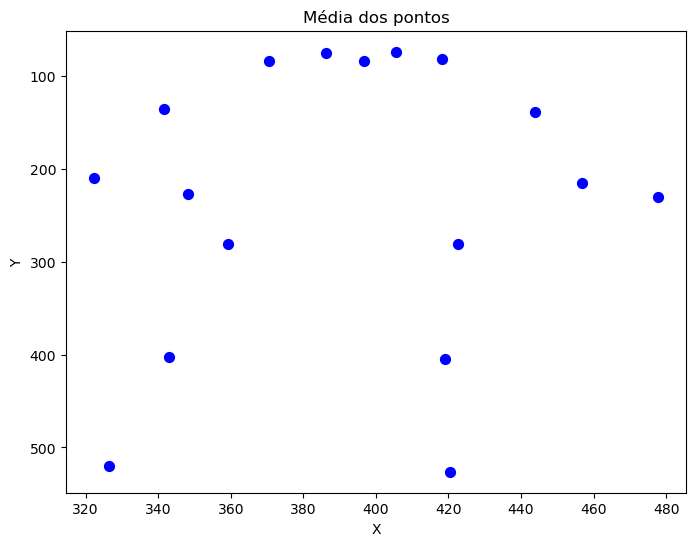

In [45]:
plt.figure(figsize=(8, 6))

plt.scatter(row[:,0], row[:,1], marker='o', color='blue', s=50)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Média dos pontos')
plt.gca().invert_yaxis()
plt.show()

In [88]:
#incomp_data.isna().sum()

In [89]:
concatenated_df = pd.concat([comp_data, incomp_data], ignore_index=True)

In [90]:
regressor = LinearRegression()
imputer = IterativeImputer(estimator=regressor, max_iter=20, random_state=0)
imputed_values = imputer.fit_transform(concatenated_df)

/home/webis/miniconda3/envs/pifpaf/lib/python3.8/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [91]:
#imputed_keypoints = imputer.transform(targets)
imputed_df = pd.DataFrame(imputed_values, columns=concatenated_df.columns)
imputed_df

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,670.79,278.54,672.53,276.80,669.33,276.84,675.250000,277.910000,667.14,277.75,...,663.08,311.66,671.870000,333.780000,661.95,333.37,669.330000,353.900000,658.410000,353.790000
1,670.59,278.36,672.35,276.72,669.16,276.74,675.200000,277.910000,667.10,277.68,...,663.10,311.44,671.510000,333.730000,661.97,333.11,669.150000,353.840000,658.440000,353.460000
2,670.50,278.39,672.29,276.75,669.06,276.78,675.090000,277.890000,666.95,277.59,...,663.07,311.42,671.510000,333.850000,661.94,333.21,669.080000,353.980000,658.330000,353.180000
3,670.49,278.43,672.24,276.77,668.98,276.81,675.090000,277.920000,666.81,277.74,...,663.03,311.28,671.260000,333.480000,661.58,331.99,668.910000,353.410000,658.260000,352.930000
4,670.54,278.39,672.16,276.70,668.93,276.77,674.870000,277.800000,666.57,277.89,...,662.88,311.34,671.120000,333.490000,661.34,331.94,669.100000,353.390000,658.040000,352.460000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140871,264.26,251.87,265.97,249.19,261.93,249.54,269.770000,249.170000,258.29,249.65,...,260.60,299.52,277.425434,329.148878,261.55,330.24,279.254800,356.062066,262.182302,356.689498
140872,332.91,238.93,334.42,236.78,330.78,236.94,335.605364,237.774057,326.42,237.79,...,326.29,282.01,336.050000,307.750000,325.88,308.91,333.070000,327.300000,323.970000,329.980000
140873,334.58,239.43,335.88,237.21,332.27,237.36,336.892987,238.070663,328.03,238.13,...,327.28,283.02,336.120000,309.790000,326.18,309.83,332.720000,329.950000,323.830000,332.950000
140874,334.87,240.07,336.13,237.77,332.61,238.09,338.740000,237.740000,328.64,238.66,...,328.48,286.38,338.210000,308.990000,327.91,311.20,341.447527,331.956340,326.250000,332.110000


In [92]:
normalized_df = (concatenated_df - concatenated_df.min()) / (concatenated_df.max() - concatenated_df.min())

In [93]:
df_interpolated = concatenated_df.interpolate(method='linear')

In [94]:
imputed_df.min()

nose_x              14.710000
nose_y               5.730000
left_eye_x          22.300000
left_eye_y          -1.229434
right_eye_x          6.710000
right_eye_y         -1.805652
left_ear_x          22.397498
left_ear_y          -3.052794
right_ear_x         -4.593999
right_ear_y         -7.989247
left_shoulder_x     22.210000
left_shoulder_y     11.660000
right_shoulder_x    -7.115386
right_shoulder_y    11.850000
left_elbow_x        35.690000
left_elbow_y        -4.623755
right_elbow_x       -1.257026
right_elbow_y       41.540000
left_wrist_x        26.020000
left_wrist_y       -79.033671
right_wrist_x      -12.026069
right_wrist_y        5.890000
left_hip_x          29.190000
left_hip_y          36.740000
right_hip_x         11.320000
right_hip_y         46.900000
left_knee_x         17.450000
left_knee_y         64.570000
right_knee_x         0.050000
right_knee_y        60.183881
left_ankle_x       -23.574631
left_ankle_y        88.190000
right_ankle_x      -28.437328
right_ankl

In [115]:
#imputed_df.to_csv('data/imputed_full_body.csv', index=False)

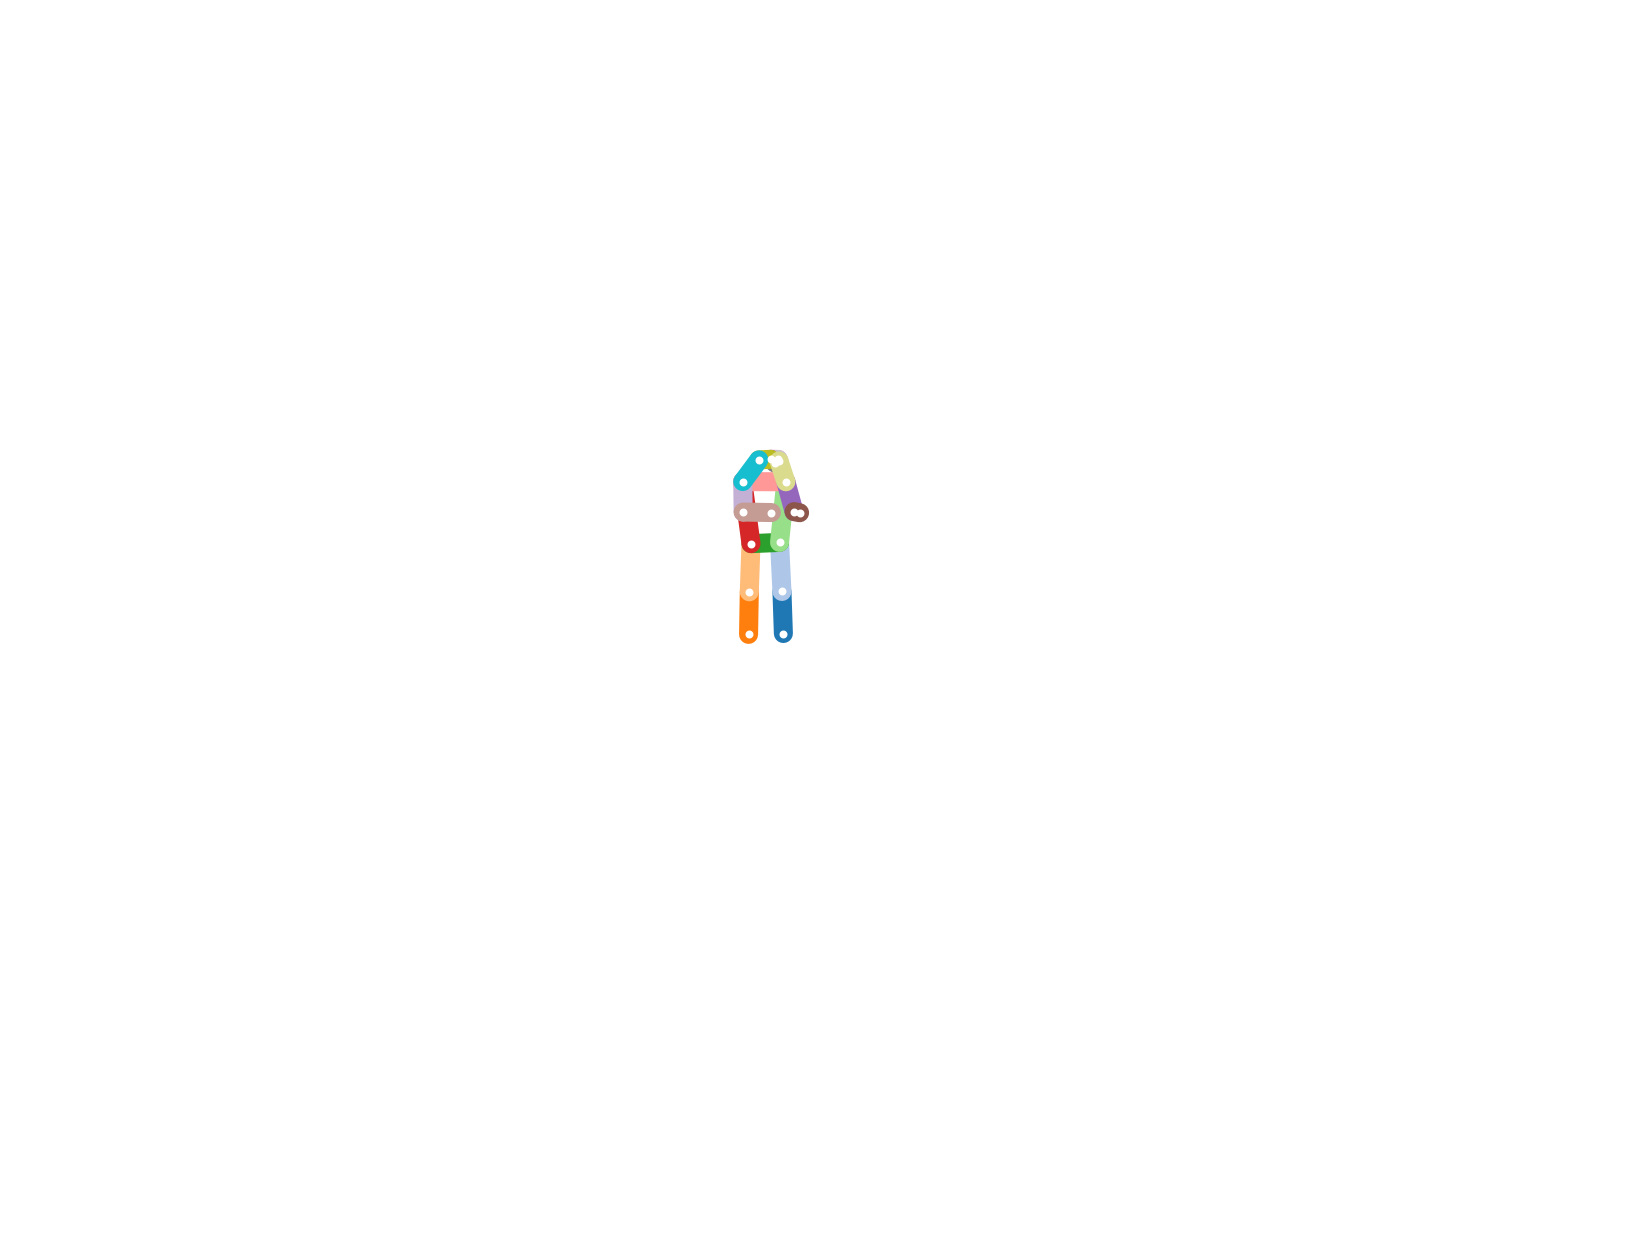

In [114]:
row = imputed_df.sample(1).values.reshape(17,2)
show_keypoints(row)

In [104]:
#imputed_keypoints = imputer.transform(targets)
imputed_df = pd.DataFrame(imputed_keypoints, columns=features.columns)
imputed_df

NameError: name 'imputed_keypoints' is not defined